Биглова Диана  
Работа по заданию для модуля №7

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## П. 1.
Чтение данных  
Проверка качества датасета  



In [16]:
# прочитать датасет 
game_data = pd.read_csv('vgsales.csv')
# узнать размер
print(game_data.shape)

# посмотреть первые строчки
game_data.head()


(16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [17]:
# проверить на Nan 
game_data.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [18]:
# по отношению к общему числу элементов количество Nan достаточно мало. Gоэтому при необходимости их можно просто удалить
# удалить строки где Nan в стоблце год
game_data.dropna(axis=0, subset =  'Year',  inplace = True)

# Nan в графе Publisher заменить на Unknown
game_data.loc[game_data.Publisher.isna(), 'Publisher'] = 'Unknown'
# проверить на Nan 
game_data.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [19]:
# проверить типы стоблцов
print(game_data.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [20]:
# все столбцы кроме Year имеют подходящий формат
# Year надо поменять на дату
game_data["Year"] = pd.to_datetime(game_data["Year"], format='%Y')

# pd.to_datetime(df['Dates'], format='%Y%m%d') 

print(game_data.dtypes)

Rank                     int64
Name                    object
Platform                object
Year            datetime64[ns]
Genre                   object
Publisher               object
NA_Sales               float64
EU_Sales               float64
JP_Sales               float64
Other_Sales            float64
Global_Sales           float64
dtype: object


In [21]:
# полных дубликатов нет
duplicateRows = game_data[game_data.duplicated()]
print(duplicateRows.shape)

# дубликаты по имени отличаются платформами и т.д.
game_data.loc[game_data['Name']=='Grand Theft Auto', :]


(0, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
684,686,Grand Theft Auto,PS,1997-01-01,Action,Take-Two Interactive,0.79,1.35,0.04,0.14,2.32
6905,6907,Grand Theft Auto,GBA,2004-01-01,Action,Take-Two Interactive,0.17,0.06,0.00,0.00,0.24


In [11]:
# сохранить промежуточный файл
game_data.to_csv('game_data.csv', index=False)

## П.2 Статистика

In [57]:
# загрузка 
game_data = pd.read_csv('game_data.csv')
print(game_data.shape)
game_data.columns

(16327, 11)


Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [30]:
# посмотреть  статистику по численным столбцам

stats = game_data.describe(include=['float64'])
stats

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,0.265415,0.147554,0.078661,0.048325,0.540232
std,0.821591,0.508766,0.311557,0.189885,1.565732
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [31]:
# посмотреть медианы
game_data.loc[:, ['NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].median()

NA_Sales        0.08
EU_Sales        0.02
JP_Sales        0.00
Other_Sales     0.01
Global_Sales    0.17
dtype: float64

Видно что распределения сборов не нормальны (максимумы около 20-40-80, а медианы и средние меньше 1)  
Очень асимметричны  

Т.е., есть отдельные выделяющиеся по сборам супер-успешные игры  
И остальное большинство

Основную часть сборов обеспечивает Северная Америка  
Можно предположить что надо ориентироваться на тип игр, который лучше всего продаётся в Америке

In [34]:
# посмотреть какое распределние по жанрам
genres = game_data['Genre'].value_counts()

# посчитать средннюю  выручку на одну игру в жанре (очень топорно, увы)
genres_mean = game_data.loc[:, ['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].groupby(['Genre']).mean()

# совместить, остортировать по 	Global_Sales
genres_all = pd.merge(genres_mean, genres, how='left', left_index=True, right_index=True).sort_values(by = 'Global_Sales', ascending= False)
genres_all

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,count
Genre,,,,,,
Platform,0.509121,0.229075,0.149144,0.058801,0.946518,876
Shooter,0.448643,0.242161,0.029782,0.079485,0.800468,1282
Role-Playing,0.221958,0.127519,0.238131,0.040367,0.628035,1471
Racing,0.291134,0.192757,0.046175,0.062545,0.592798,1226
Sports,0.290838,0.161172,0.058490,0.057574,0.568247,2304
Fighting,0.264043,0.119617,0.104246,0.043289,0.531160,836
Action,0.264925,0.158770,0.048773,0.056846,0.529628,3253
Misc,0.235368,0.125041,0.062380,0.043287,0.466444,1710
Simulation,0.213608,0.133020,0.074665,0.036851,0.458472,851


Получается, что средние сборы на одну игру максимальны у платформеров, шутеров и ролевых игр  
Осталось понять насколько вообще правомерно делать выводы по среднему данных с таким распределением

In [37]:
# посмотреть платформы 
platforms = game_data['Platform'].value_counts()

#  так же считаем среднее
platforms_mean = game_data.loc[:, ['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].groupby(['Platform']).mean()

platforms_all = pd.merge(platforms_mean, platforms, how='left', left_index=True, right_index=True).sort_values(by = 'Global_Sales', ascending= False)
platforms_all.head(40)


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,count
Platform,,,,,,
GB,1.171546,0.489794,0.877526,0.084124,2.622887,97
NES,1.285102,0.215816,1.006633,0.054184,2.561939,98
GEN,0.713704,0.204444,0.098889,0.032963,1.050370,27
SNES,0.256192,0.079665,0.487657,0.013473,0.837029,239
PS4,0.288095,0.368155,0.042560,0.129048,0.827679,336
X360,0.481239,0.225109,0.009960,0.068559,0.785109,1235
2600,0.696379,0.041897,0.000000,0.007241,0.746293,116
PS3,0.298236,0.261097,0.060744,0.107983,0.728029,1304
Wii,0.385558,0.204922,0.052930,0.061395,0.705279,1290


В списке на первых местах платформы GameBoy и Nintendo Entertainment System, которые сейчас скорее винтаж, чем популярные платформы  
Т.е. следует учитывать ещё и фактор актуальности


# П. 3 Графики

In [4]:
# загрузка 
game_data = pd.read_csv('game_data.csv')
print(game_data.shape)
game_data.columns

(16327, 11)


Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

<AxesSubplot:>

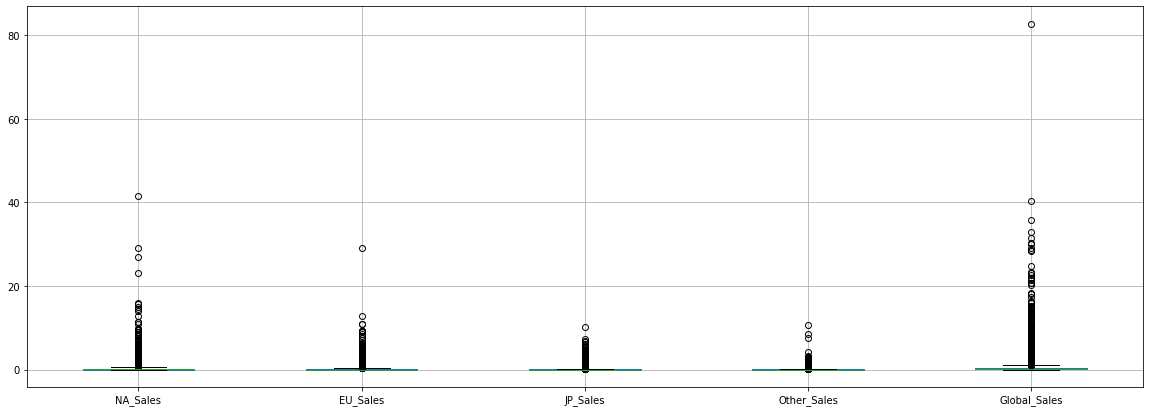

In [35]:
#  ящики с усами чтобы посмотреть распределение продаж
game_data.boxplot(column=['NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], figsize = (20, 7))

Заметен очень большой "выброс" (даже на фоне других, на фоне которых мы даже не видим сами ящики) - Global sales больше 80  (также скорее всего он же соответсвует NA sales > 40 и Eu sales > 20)  

Но учитывая общую форму распределения, скорее это можно считать за его длинный "хвост"


## Посмотреть на эти элементы

In [51]:
game_data[game_data.NA_Sales > 20]

# жанры, что интересно, все разные

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
5,6,Tetris,GB,1989-01-01,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,10,Duck Hunt,NES,1984-01-01,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## Продолжение

<AxesSubplot:>

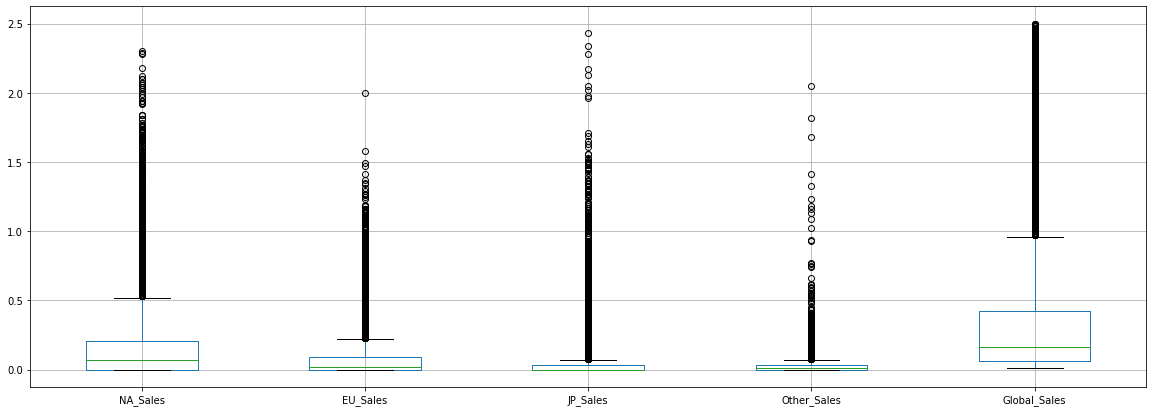

In [33]:
#  ради интереса делаем радикальную обрезку (Global_Sales > 2.5) и смотрим на основную массу данных
game_data_crop = game_data.drop(game_data[game_data.Global_Sales > 2.5].index)

game_data_crop.boxplot(column=['NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], figsize = (20, 7))

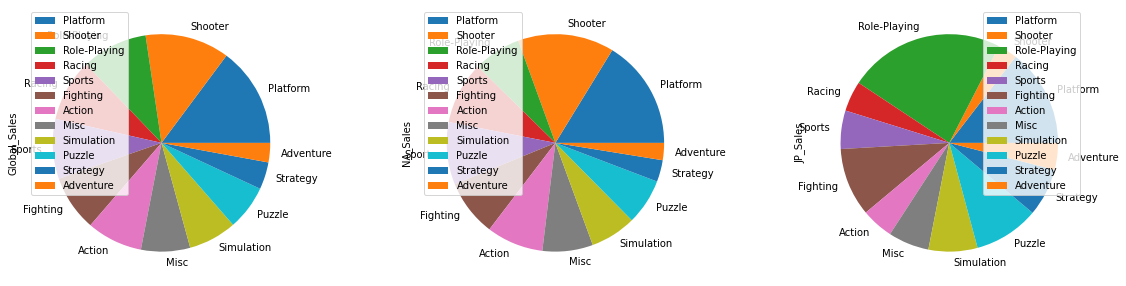

In [56]:
# визуализация распределения выручки по жанрам
plot = genres_all.loc[:, ['Global_Sales', 'NA_Sales',  'JP_Sales', ]].plot.pie(figsize=(20, 5), subplots = True)


<AxesSubplot:xlabel='Year'>

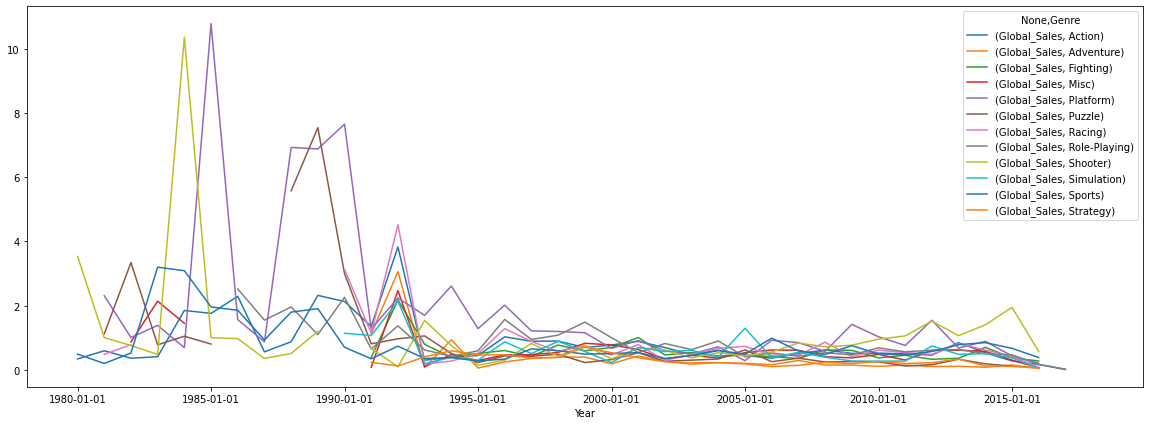

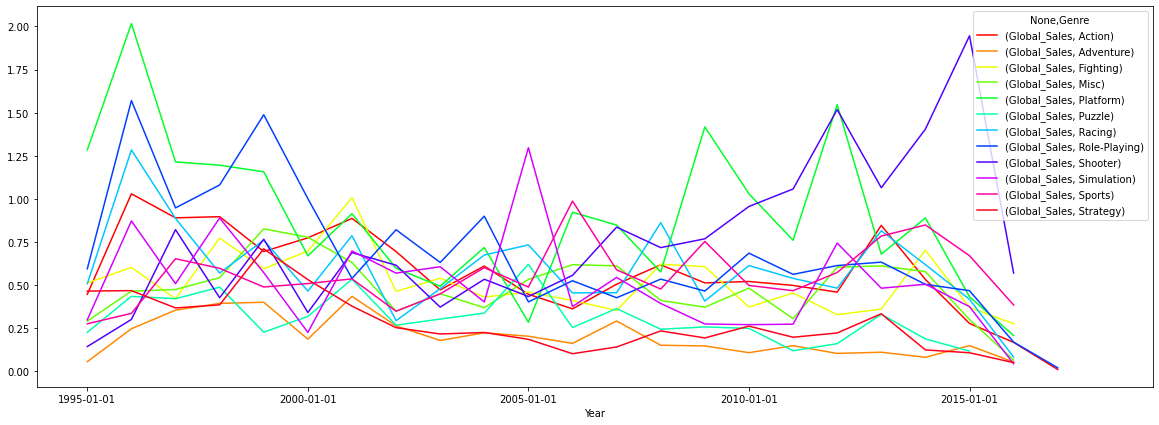

In [107]:
# распределение выручки по жанрам по годам
sorted_year = game_data.sort_values(['Year', 'Genre']).set_index(['Year', 'Genre'])
sorted_year

# опять считаем среднее - условные "продажи на игру" 
sorted_year_mean = sorted_year.loc[:, ['Global_Sales']].groupby(level=['Year', 'Genre']).mean()

# сначала общий вид графика для масштаба
sorted_year_mean.unstack().plot(figsize = (20, 7), sharey = True)
# график  после  1995 года
sorted_year_mean.loc['1995-01-01':, :].unstack().plot(figsize = (20, 7), sharey = True, colormap = 'hsv')



Исходя из этого графика можно сделать вывод, что  шутеры и  платформеры даже в последние годы преобладают по сборам, как и при оценке по общим средним, а после 2015 года ещё выделяются спортивный жанр, файтинги и рпг, однако нет тенденции роста популярности этих жанров

# 4. Матрицы корреляции

<AxesSubplot:>

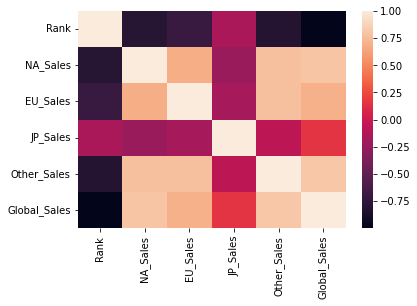

In [3]:
# не особо информативная матрица
# однако видно, что продажи в Японии сильно расходятся  с остальными миром (корреляции с ранжированием, сделанным по мировым продажам, почти нет)
# безотносительно прочего, это значит что для японского рынка нужно делать отдельный анализ

corr = game_data.corr(method='spearman', min_periods=3, numeric_only = True)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [131]:
# корреляция ранга с жанрами, закондированными с помощью one-hot-encoding
# имеет значение только первая строчка - корреляция жанров с рангои
# поскольку ранг чем меньше тем лучше, а наличие жанра кодируется как '1', то корелляция чем отрицательнее, тем лучше
# в целом картина не очень вдохновляющая, но  по-прежнему лидируют спорт, шутеры и платформеры
merge_df = pd.merge(game_data['Rank'], pd.get_dummies(game_data['Genre']), left_index=True, right_index=True)
corr = merge_df.corr(method='spearman', min_periods=3, numeric_only = True)
corr.iloc[0, :].sort_values()

Sports         -0.073468
Platform       -0.069739
Shooter        -0.058541
Fighting       -0.032524
Action         -0.031675
Racing         -0.021881
Role-Playing   -0.015275
Simulation      0.014482
Misc            0.018342
Puzzle          0.054124
Strategy        0.076757
Adventure       0.197394
Rank            1.000000
Name: Rank, dtype: float64

<AxesSubplot:>

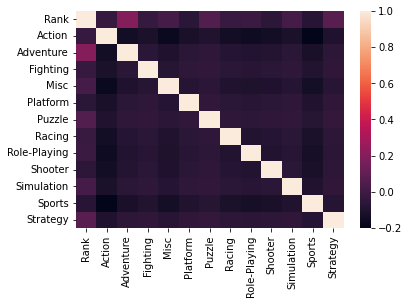

In [126]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [138]:
# то же самое без японии
game_data['Global_noJP'] = game_data['Global_Sales'] - game_data['JP_Sales']

# корреляция мировых продаж без продаж в Японии с жанрами, закондированными с помощью one-hot-encoding
# по-прежнему лидируют спорт, шутеры и платформеры, теперь чуть более уверенно, но всё ещё очень слабо
merge_df = pd.merge(game_data['Global_noJP'], pd.get_dummies(game_data['Genre']), left_index=True, right_index=True)
corr = merge_df.corr(method='spearman', min_periods=3, numeric_only = True)
corr.iloc[0, :].sort_values(ascending = False)

Global_noJP     1.000000
Shooter         0.099104
Platform        0.088535
Racing          0.073978
Sports          0.073628
Action          0.057783
Simulation     -0.006247
Fighting       -0.007848
Misc           -0.020995
Puzzle         -0.037047
Role-Playing   -0.090158
Strategy       -0.097225
Adventure      -0.198757
Name: Global_noJP, dtype: float64

# 5. Вывод

Анализ данных показал, что на протяжении развития игровой индустрии по объёму выручки в пересчёте на одну игру преобладали шутеры и платформеры, и такая ситуация сохраняется и до настоящего времени.  

В то же время, в целом корреляция жанра с объёмом выручки по конкретной игре низкая, и вряд ли можно говорить о том, что выбор конкретного жанра заметно повысит шансы на успех.